In [23]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# Base df
df = pd.read_csv('data/z_df_ready_for_analysis.csv')

In [29]:
# df exluding year outliers

# Step 1: Compute Q1, Q3, and IQR
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the outlier rows
outlier_years = df[(df['year'] < lower_bound) | (df['year'] > upper_bound)]['year'].unique()

# Step 4: Keep only rows where 'year' is NOT an outlier
df_no_o = df[(df['year'] >= lower_bound) & (df['year'] <= upper_bound)].copy()

In [ ]:
# Make sure gender is a categorical variable with the desired order for plotting
# Base df
df['author_gender'] = pd.Categorical(
    df['author_gender'].replace({0: 'Male', 1: 'Female'}),
    categories=['Male', 'Female'],
    ordered=True
)

# No outliers df
df_no_o['author_gender'] = pd.Categorical(
    df_no_o['author_gender'].replace({0: 'Male', 1: 'Female'}),
    categories=['Male', 'Female'],
    ordered=True
)

# Standardized Means 
## General

In [8]:
df[['z_prop_pos','z_prop_neg','z_diff_prop']].describe()

,z_prop_pos,z_prop_neg,z_diff_prop
count,1.386900e+04,1.386900e+04,1.386900e+04
mean,1.352536e-16,-8.402120e-17,2.213241e-16
std,1.000036e+00,1.000036e+00,1.632462e+00
min,-1.733324e+00,-2.002652e+00,-3.726654e+00
25%,-7.145819e-01,-7.731193e-01,-1.150515e+00
50%,-3.542010e-02,-4.661141e-03,-3.407555e-02
75%,6.176201e-01,7.637970e-01,1.045082e+00
max,3.360389e+00,1.993330e+00,5.363041e+00


In [32]:
df_no_o[['z_prop_pos','z_prop_neg','z_diff_prop']].describe()

,z_prop_pos,z_prop_neg,z_diff_prop
count,12631.000000,12631.000000,12631.000000
mean,0.000967,0.043561,-0.042594
std,1.003642,1.001777,1.636969
min,-1.733324,-2.002652,-3.726654
25%,-0.714582,-0.773119,-1.183148
50%,-0.035420,0.149030,-0.092116
75%,0.617620,0.763797,0.998915
max,3.360389,1.993330,5.363041


## by Author Gender

In [34]:
df.groupby('author_gender')[['z_prop_pos','z_prop_neg','z_diff_prop']].describe()

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_23502/1455878219.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('author_gender')[['z_prop_pos','z_prop_neg','z_diff_prop']].describe()


z_prop_pos                                                    \
                   count      mean       std       min       25%       50%   
author_gender                                                                
Male              4204.0 -0.136796  1.061596 -1.733324 -0.949676 -0.166028   
Female            9665.0  0.059502  0.966073 -1.733324 -0.557852 -0.035420   

                                 z_prop_neg            ...                     \
                   75%       max      count      mean  ...       75%      max   
author_gender                                          ...                      
Male           0.61762  3.360389     4204.0  0.057562  ...  0.994334  1.99333   
Female         0.61762  3.360389     9665.0 -0.025038  ...  0.661336  1.99333   

              z_diff_prop                                                    \
                    count      mean       std       min       25%       50%   
author_gender                                                                 
Male               4204.0 -0.194359  1.808203 -3.726654 -1.490531 -0.315059   
Female             9665.0  0.084540  1.542287 -3.726654 -0.989507  0.054758   

                                   
                    75%       max  
author_gender                      
Male           0.998915  5.363041  
Female         1.080116  5.363041  

[2 rows x 24 columns]

In [35]:
df_no_o.groupby('author_gender')[['z_prop_pos','z_prop_neg','z_diff_prop']].describe()

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_23502/845911213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_no_o.groupby('author_gender')[['z_prop_pos','z_prop_neg','z_diff_prop']].describe()


z_prop_pos                                                    \
                   count      mean       std       min       25%       50%   
author_gender                                                                
Male              3484.0 -0.173552  1.068145 -1.733324 -0.949676 -0.166028   
Female            9147.0  0.067439  0.969791 -1.733324 -0.557852 -0.035420   

                                 z_prop_neg            ...                     \
                   75%       max      count      mean  ...       75%      max   
author_gender                                          ...                      
Male           0.58200  3.360389     3484.0  0.170040  ...  1.071180  1.99333   
Female         0.61762  3.360389     9147.0 -0.004614  ...  0.763797  1.99333   

              z_diff_prop                                                    \
                    count      mean       std       min       25%       50%   
author_gender                                                                 
Male               3484.0 -0.343592  1.809531 -3.726654 -1.631071 -0.491834   
Female             9147.0  0.072053  1.551068 -3.726654 -1.014266  0.022705   

                                   
                    75%       max  
author_gender                      
Male           0.798446  5.363041  
Female         1.049726  5.363041  

[2 rows x 24 columns]

# Regressions

## Total (Difference in Standardized Proportions)
### Year Outliers Included

In [ ]:
# Regression Coefficients 
model = smf.ols('z_diff_prop ~ author_gender + master_genre + author_gender*master_genre + year', data=df).fit()
print(model.summary())

# -> year significant (negative)

In [ ]:
# Without interaction -> ag and g significant
model_me = smf.ols('z_diff_prop ~ C(author_gender) + C(master_genre)', data=df).fit()
anova_model_me = anova_lm(model_me, typ=3)
print(anova_model_me)

                        sum_sq       df           F         PR(>F)
Intercept             0.232817      1.0    0.094256   7.588396e-01
C(author_gender)     29.322407      1.0   11.871137   5.717952e-04
C(master_genre)    2501.783718     10.0  101.284376  1.120967e-203
Residual          34227.605747  13857.0         NaN            NaN


In [13]:
# With interaction -> ag*g significant
model_me_i = smf.ols('z_diff_prop ~ C(author_gender) * C(master_genre)', data=df).fit()
anova_model_me_i = anova_lm(model_me_i, typ=3)
print(anova_model_me_i)

                                        sum_sq       df          F  \
Intercept                             4.721091      1.0   1.919627   
C(author_gender)                     11.207324      1.0   4.556972   
C(master_genre)                    1012.999142     10.0  41.189219   
C(author_gender):C(master_genre)    172.580206     10.0   7.017226   
Residual                          34055.025541  13847.0        NaN   

                                        PR(>F)  
Intercept                         1.659201e-01  
C(author_gender)                  3.280249e-02  
C(master_genre)                   4.968027e-81  
C(author_gender):C(master_genre)  4.403798e-11  
Residual                                   NaN  


### Year Outliers NOT Included

In [ ]:
# Regression Coefficients 
model = smf.ols('z_diff_prop ~ author_gender + master_genre + author_gender*master_genre + year', data=df_no_o).fit()
print(model.summary())

# -> year significant (negative) (but less)

In [ ]:
# Without interaction -> ag and g still significant
model_me = smf.ols('z_diff_prop ~ C(author_gender) + C(master_genre)', data=df_no_o).fit()
anova_model_me = anova_lm(model_me, typ=3)
print(anova_model_me)

                        sum_sq       df          F         PR(>F)
Intercept            12.123820      1.0   4.900397   2.686833e-02
C(author_gender)     92.991200      1.0  37.586651   9.005012e-10
C(master_genre)    2188.287958     10.0  88.449678  2.855424e-177
Residual          31220.018489  12619.0        NaN            NaN


In [ ]:
# With interaction -> ag*g still significant
model_me_i = smf.ols('z_diff_prop ~ C(author_gender) * C(master_genre)', data=df_no_o).fit()
anova_model_me_i = anova_lm(model_me_i, typ=3)
print(anova_model_me_i)

                                        sum_sq       df          F  \
Intercept                             7.260051      1.0   2.948934   
C(author_gender)                      5.632129      1.0   2.287695   
C(master_genre)                     772.488173     10.0  31.377426   
C(author_gender):C(master_genre)    177.626852     10.0   7.214963   
Residual                          31042.391637  12609.0        NaN   

                                        PR(>F)  
Intercept                         8.595875e-02  
C(author_gender)                  1.304285e-01  
C(master_genre)                   1.174943e-60  
C(author_gender):C(master_genre)  1.846697e-11  
Residual                                   NaN  


### Plots

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_23502/2023288478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='author_gender', y='z_diff_prop', palette='pastel', errorbar=('ci', 95))


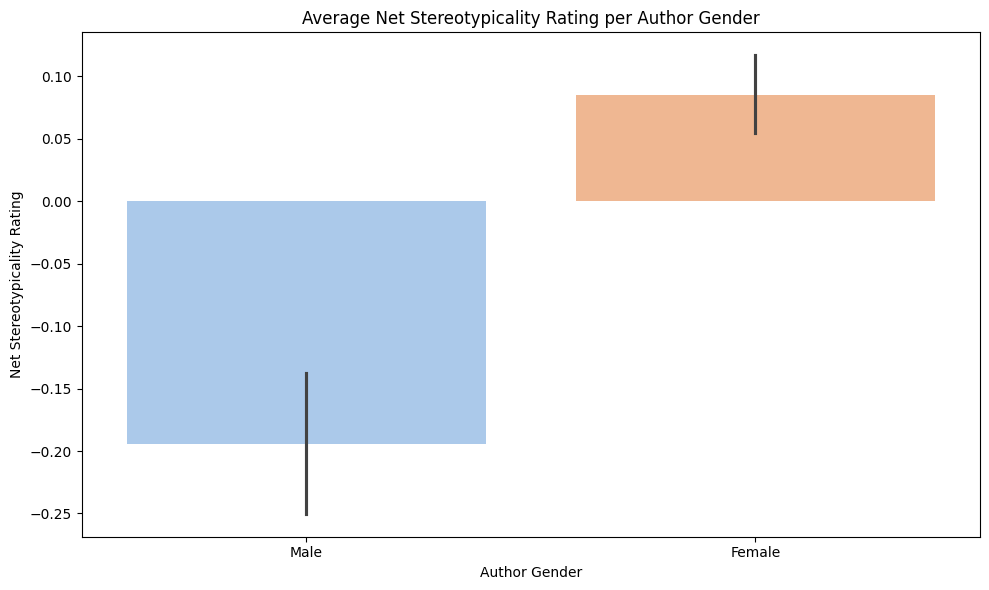

In [22]:
# Author Gender ME - Total - Plot
# Significance: C(author_gender)     29.322407      1.0   11.871137   5.717952e-04

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='author_gender', y='z_diff_prop', palette='pastel', errorbar=('ci', 95))

plt.title("Average Net Stereotypicality Rating per Author Gender")
plt.ylabel("Net Stereotypicality Rating")
plt.xlabel("Author Gender")
plt.tight_layout()
plt.show()

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_23502/1748057644.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('master_genre')['z_diff_prop'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_23502/1748057644.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df,


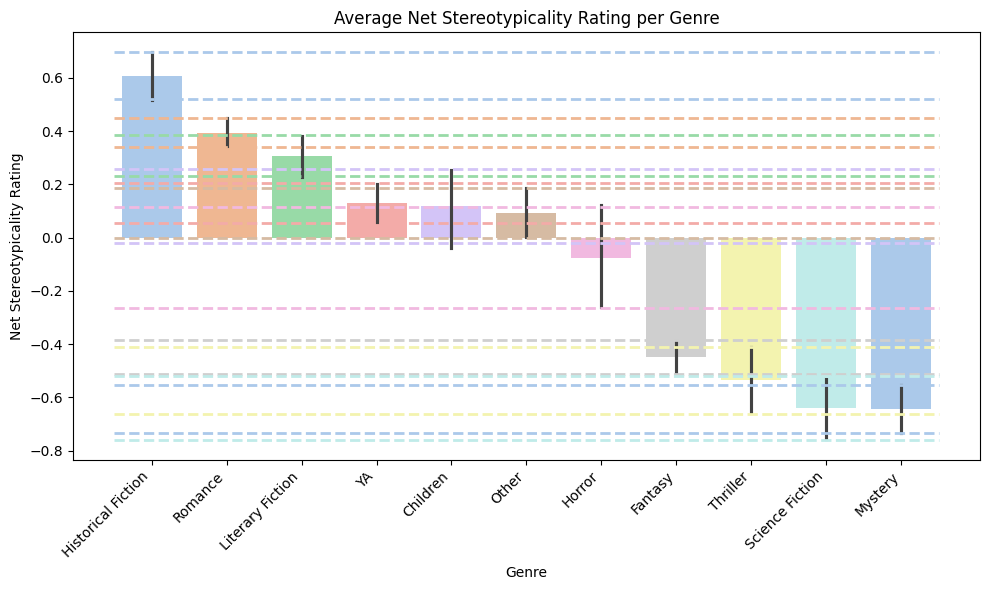

In [ ]:
# Genre ME - Total - Plot

# Calculate means and confidence intervals per group
summary = df.groupby('master_genre')['z_diff_prop'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df, 
                      x='master_genre', 
                      y='z_diff_prop', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average Net Stereotypicality Rating per Genre")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Net Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

In [ ]:
# ONLINE SUPPLEMENT ONLY
# Genre ME - Total - Significance Test 

# -- Which genres are significantly different from each other? --

# Drop NA values to avoid errors
df_clean = df[['master_genre', 'z_diff_prop']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['z_diff_prop'],
                          groups=df_clean['master_genre'],
                          alpha=0.05)

print(tukey.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
          Children            Fantasy  -0.5666    0.0 -0.8762  -0.257   True
          Children Historical Fiction   0.4905    0.0  0.1708  0.8102   True
          Children             Horror  -0.1931 0.8992 -0.5917  0.2056  False
          Children   Literary Fiction   0.1906  0.705 -0.1291  0.5102  False
          Children            Mystery  -0.7613    0.0 -1.0833 -0.4393   True
          Children              Other  -0.0261    1.0 -0.3516  0.2995  False
          Children            Romance   0.2759 0.1154 -0.0278  0.5796  False
          Children    Science Fiction  -0.7588    0.0 -1.1054 -0.4121   True
          Children           Thriller  -0.6535    0.0 -0.9875 -0.3196   True
          Children                 YA   0.0111    1.0 -0.3186  0.3407  False

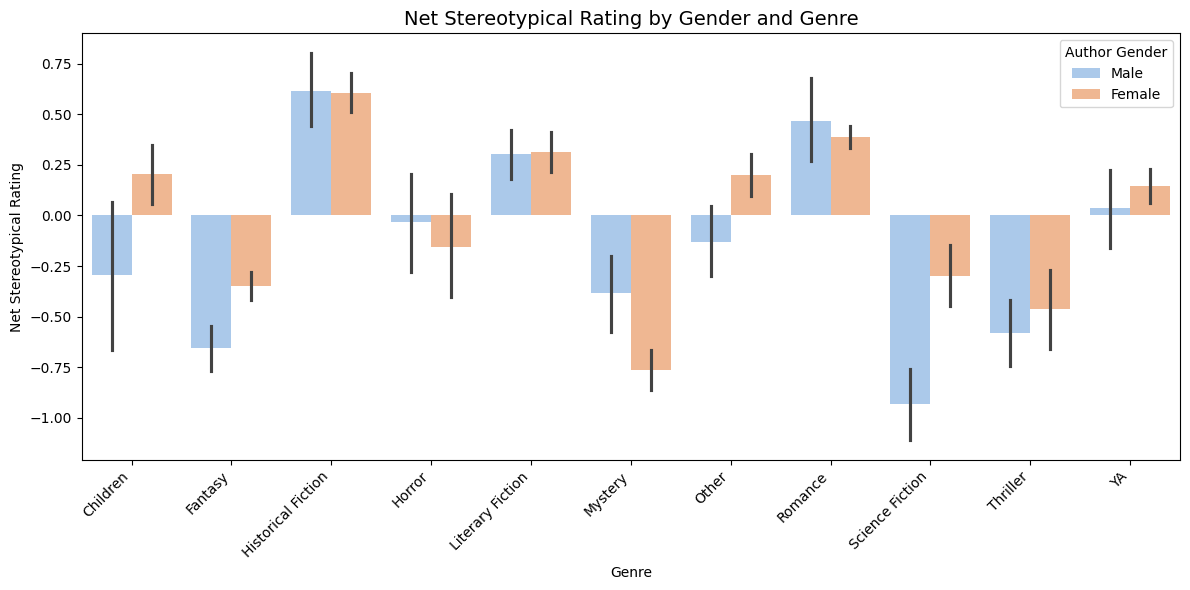

In [25]:
# Interaction - Total - Plot

plt.figure(figsize=(12, 6))

sns.barplot(
    data=df,
    x='master_genre',
    y='z_diff_prop',
    hue='author_gender',
    palette='pastel',
    errorbar=('ci', 95),
)

plt.xticks(rotation=45, ha='right')
plt.title("Net Stereotypical Rating by Gender and Genre", fontsize=14)
plt.ylabel("Net Stereotypical Rating")
plt.xlabel("Genre")
plt.legend(title="Author Gender")
plt.tight_layout()
plt.show()

In [26]:
# ONLINE SUPPLEMENT ONLY
# Interaction - Total - Significance Test

df_clean = df[['master_genre', 'author_gender', 'z_diff_prop']].dropna()

# Create interaction column
df_clean['interaction'] = df_clean['author_gender'].astype(str) + "_" + df_clean['master_genre'].astype(str)

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df_clean['z_diff_prop'],
                          groups=df_clean['interaction'],
                          alpha=0.05)

print(tukey.summary())

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                    group2          meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------
          Female_Children            Female_Fantasy  -0.5565    0.0 -0.9417 -0.1713   True
          Female_Children Female_Historical Fiction   0.3981 0.0509 -0.0006  0.7968  False
          Female_Children             Female_Horror  -0.3642   0.89  -0.988  0.2595  False
          Female_Children   Female_Literary Fiction   0.1068    1.0 -0.3048  0.5183  False
          Female_Children            Female_Mystery  -0.9715    0.0 -1.3744 -0.5686   True
          Female_Children              Female_Other  -0.0078    1.0 -0.4163  0.4006  False
          Female_Children            Female_Romance   0.1816 0.9808 -0.1892  0.5525  False
          Female_Children    Female_Science Fiction  -0.5039 0.0227 -0.9778 -0.0301   True

## Standardized Pro-Stereotypical Items
### Year Outliers Included

In [23]:
# Fit the linear regression model
model_a_pos = smf.ols('prop_pos ~ author_gender', data=df_contemp).fit()

# Print the summary
print(model_a_pos.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_pos   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.11e-25
Time:                        15:02:19   Log-Likelihood:                 2333.3
No. Observations:               12728   AIC:                            -4663.
Df Residuals:                   12726   BIC:                            -4648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3133      0

Women write significantly more stereotypical than men. 

In [24]:
model_a_g_pos = smf.ols('prop_pos ~ author_gender + master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_pos.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_pos   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     54.60
Date:                Mon, 26 May 2025   Prob (F-statistic):          8.23e-119
Time:                        15:03:15   Log-Likelihood:                 2572.1
No. Observations:               12728   AIC:                            -5120.
Df Residuals:                   12716   BIC:                            -5031.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [25]:
# F-test to see if genre has an overall significant effect
f_test_pos = anova_lm(model_a_pos, model_a_g_pos)
print(f_test_pos)

   df_resid         ssr  df_diff    ss_diff          F        Pr(>F)
0   12726.0  516.482810      0.0        NaN        NaN           NaN
1   12716.0  497.460631     10.0  19.022179  48.624155  3.079160e-96


Both author gender and genre significant. 

In [26]:
# Fit linear regression with interaction term 
model_a_g_i_pos = smf.ols('prop_pos ~ author_gender + master_genre + author_gender * master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_i_pos.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_pos   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     32.72
Date:                Mon, 26 May 2025   Prob (F-statistic):          3.32e-128
Time:                        15:04:13   Log-Likelihood:                 2613.6
No. Observations:               12728   AIC:                            -5183.
Df Residuals:                   12706   BIC:                            -5019.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [27]:
model_me_pos = smf.ols('prop_pos ~ C(author_gender) * C(master_genre)', data=df_contemp).fit()

anova_model_me_pos = anova_lm(model_me_pos, typ=3)
print(anova_model_me_pos)

                                      sum_sq       df          F        PR(>F)
Intercept                           1.764541      1.0  45.364117  1.706495e-11
C(author_gender)                    0.069477      1.0   1.786175  1.814168e-01
C(master_genre)                     4.309244     10.0  11.078524  4.556968e-19
C(author_gender):C(master_genre)    3.231831     10.0   8.308630  1.389047e-13
Residual                          494.228800  12706.0        NaN           NaN


When including interaction term: 
* author gender main effect ns
* genre main effect sig
* interaction sig


### Predictions per Group

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/1142182798.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_contemp, x='author_gender', y='prop_pos', palette='pastel', errorbar=('ci', 95))


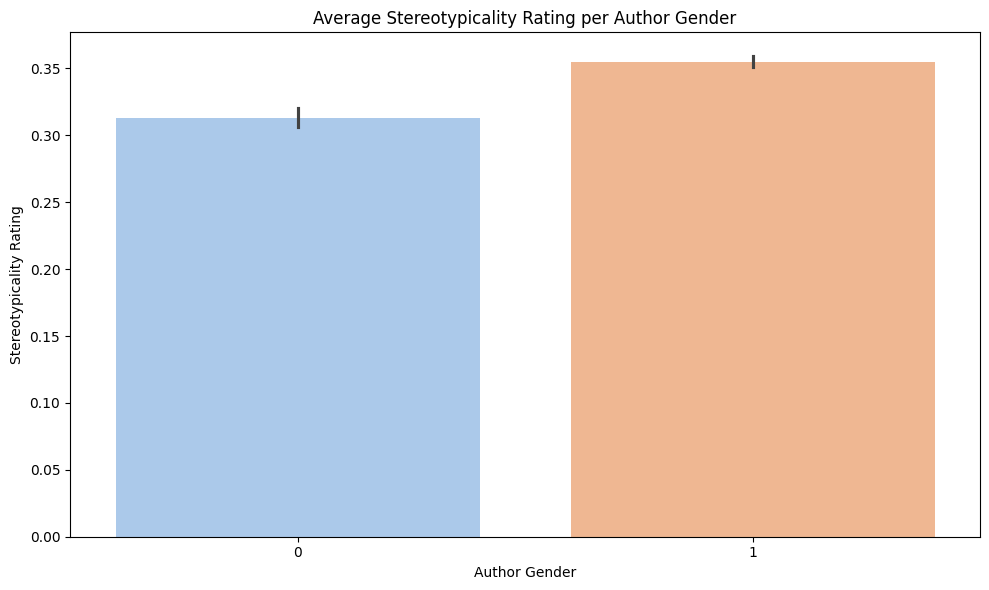

In [152]:
# Gender only - prop_pos - plot

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_contemp, x='author_gender', y='prop_pos', palette='pastel', errorbar=('ci', 95))

plt.title("Average Stereotypicality Rating per Author Gender")
plt.ylabel("Stereotypicality Rating")
plt.xlabel("Author Gender")
plt.tight_layout()
plt.show()

In [153]:
df_contemp.groupby('author_gender')['prop_pos'].mean()

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/12830605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_contemp.groupby('author_gender')['prop_pos'].mean()


author_gender
0    0.313301
1    0.355161
Name: prop_pos, dtype: float64

In [42]:
# Gender only - prop_pos - significance test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NA values to avoid errors
df_clean = df[['author_gender', 'prop_pos']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_pos'],
                          groups=df_clean['author_gender'],
                          alpha=0.05)

print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    0.034   0.0 0.0268 0.0413   True
-------------------------------------------------


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/3654209285.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_contemp.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/3654209285.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_contemp,


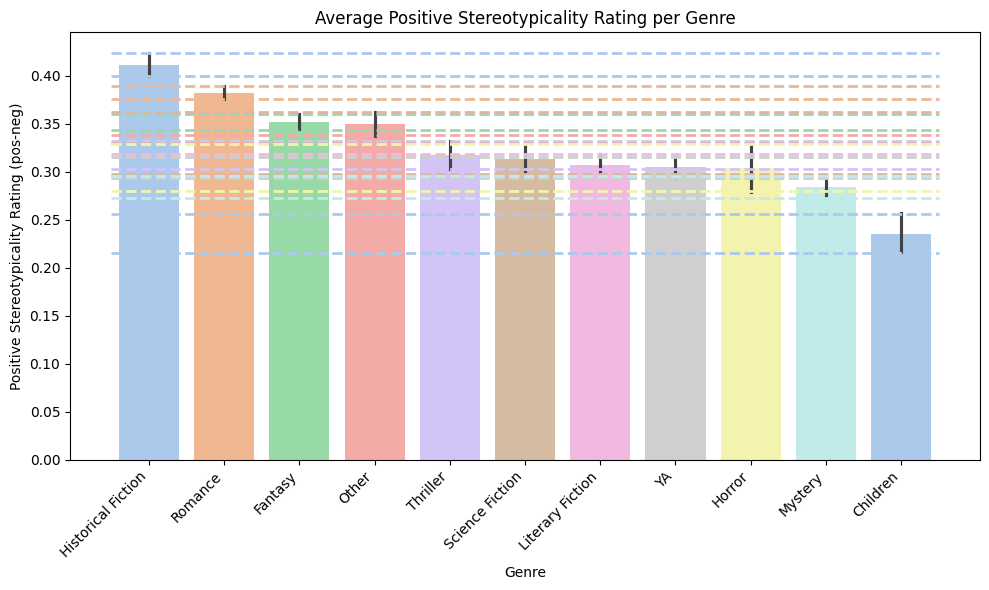

In [156]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Calculate means and confidence intervals per group
summary = df_contemp.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_contemp, 
                      x='master_genre', 
                      y='prop_pos', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average Positive Stereotypicality Rating per Genre")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Positive Stereotypicality Rating (pos-neg)")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


General idea: 
only describe what's significantly the highest and lowest visually and provide table with all pairwise comparisons as online material 

* historical fiction and romance highest
* Children lowest

In [39]:
# Genre only - prop_pos_ significance test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NA values to avoid errors
df_clean = df[['master_genre', 'prop_pos']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_pos'],
                          groups=df_clean['master_genre'],
                          alpha=0.05)

print(tukey.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
          Children            Fantasy   0.0888    0.0    0.05  0.1276   True
          Children Historical Fiction   0.1553    0.0  0.1152  0.1954   True
          Children             Horror   0.0533 0.0247  0.0034  0.1031   True
          Children   Literary Fiction   0.0485 0.0047  0.0084  0.0885   True
          Children            Mystery   0.0244 0.6873  -0.016  0.0647  False
          Children              Other   0.0868    0.0   0.046  0.1276   True
          Children            Romance   0.1213    0.0  0.0832  0.1594   True
          Children    Science Fiction   0.0541 0.0029  0.0107  0.0975   True
          Children           Thriller   0.0569 0.0006   0.015  0.0987   True
          Children                 YA    0.042 0.0423  0.0007  0.0834   True

In [ ]:
# Interaction - prop_pos - plot

# Step 1: Create the grid of combinations
predict_df_pos = pd.DataFrame(
    [(g, m) for g in df_contemp['author_gender'].unique()
            for m in df_contemp['master_genre'].unique()],
    columns=['author_gender', 'master_genre']
)

# Step 2: Match the dtypes to the training data
predict_df_pos['author_gender'] = predict_df_pos['author_gender'].astype(df_contemp['author_gender'].dtype)
predict_df_pos['master_genre'] = predict_df_pos['master_genre'].astype(df_contemp['master_genre'].dtype)

# Step 3: Make predictions
predict_df_pos['prop_pos'] = model_a_g_i_pos.predict(predict_df_pos)

In [34]:
print(predict_df_pos)

   author_gender        master_genre  prop_pos
0              1  Historical Fiction  0.415166
1              1    Literary Fiction  0.315437
2              1             Mystery  0.274595
3              1                  YA  0.308506
4              1            Children  0.245188
5              1               Other  0.374102
6              1             Romance  0.386316
7              1     Science Fiction  0.358311
8              1             Fantasy  0.365579
9              1            Thriller  0.301545
10             1              Horror  0.306389
11             0  Historical Fiction  0.401158
12             0    Literary Fiction  0.294321
13             0             Mystery  0.305723
14             0                  YA  0.283467
15             0            Children  0.200258
16             0               Other  0.293261
17             0             Romance  0.313169
18             0     Science Fiction  0.271251
19             0             Fantasy  0.322356
20           

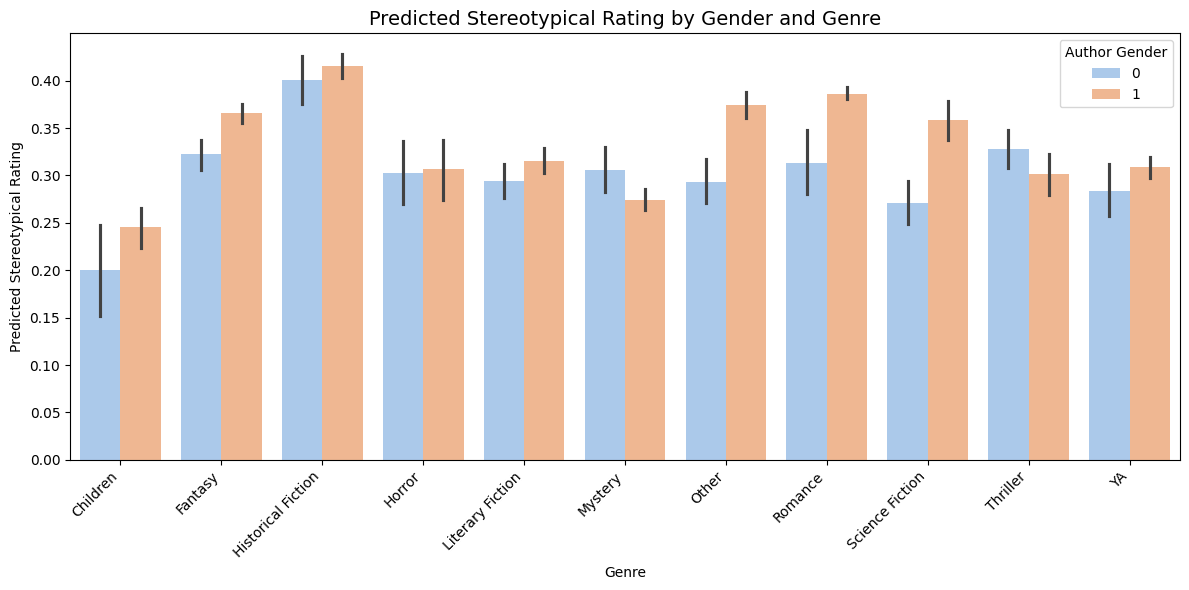

In [157]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_contemp, 
            x='master_genre', 
            y='prop_pos', 
            hue='author_gender', 
            palette='pastel',
            errorbar= ('ci', 95))

plt.xticks(rotation=45, ha='right')
plt.title("Predicted Stereotypical Rating by Gender and Genre", fontsize=14)
plt.ylabel("Predicted Stereotypical Rating")
plt.xlabel("Genre")
plt.legend(title="Author Gender")
plt.tight_layout()
plt.show()

In [164]:
# put stars for significant differences

In [163]:
# Interaction - prop_pos - gender per genre significance test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_clean = df_contemp[['master_genre', 'author_gender', 'prop_pos']].dropna()

# Create interaction column
df_clean['interaction'] = df_clean['author_gender'].astype(str) + "_" + df_clean['master_genre'].astype(str)

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_pos'],
                          groups=df_clean['interaction'],
                          alpha=0.05)

print(tukey.summary())

/Users/svenjakratzke/Desktop/Thesis/thesis/venv/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
          0_Children            0_Fantasy   0.1221 0.0128  0.0117  0.2325   True
          0_Children 0_Historical Fiction   0.2009    0.0  0.0871  0.3147   True
          0_Children             0_Horror   0.1025 0.1914 -0.0151  0.2201  False
          0_Children   0_Literary Fiction   0.0941 0.2593 -0.0184  0.2065  False
          0_Children            0_Mystery   0.1055 0.1057 -0.0076  0.2185  False
          0_Children              0_Other    0.093  0.305  -0.021   0.207  False
          0_Children            0_Romance   0.1129 0.1011 -0.0076  0.2334  False
          0_Children    0_Science Fiction    0.071  0.815 -0.0428  0.1848  False
          0_Children           0_Thriller   0.1276 0.0069  0.0166  0.2385   True
          0_Children        

### Genre differences within one gender?

In [168]:
# Significance Test
df_clean = df_contemp[['master_genre', 'author_gender', 'prop_pos']].dropna()

# Create interaction column
df_clean['interaction'] = df_clean['author_gender'].astype(str) + "_" + df_clean['master_genre'].astype(str)

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_pos'],
                          groups=df_clean['interaction'],
                          alpha=0.05)
print(tukey.summary())

/Users/svenjakratzke/Desktop/Thesis/thesis/venv/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
          0_Children            0_Fantasy   0.1221 0.0128  0.0117  0.2325   True
          0_Children 0_Historical Fiction   0.2009    0.0  0.0871  0.3147   True
          0_Children             0_Horror   0.1025 0.1914 -0.0151  0.2201  False
          0_Children   0_Literary Fiction   0.0941 0.2593 -0.0184  0.2065  False
          0_Children            0_Mystery   0.1055 0.1057 -0.0076  0.2185  False
          0_Children              0_Other    0.093  0.305  -0.021   0.207  False
          0_Children            0_Romance   0.1129 0.1011 -0.0076  0.2334  False
          0_Children    0_Science Fiction    0.071  0.815 -0.0428  0.1848  False
          0_Children           0_Thriller   0.1276 0.0069  0.0166  0.2385   True
          0_Children        

#### Men

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/1623065971.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_male.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/1623065971.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_male,


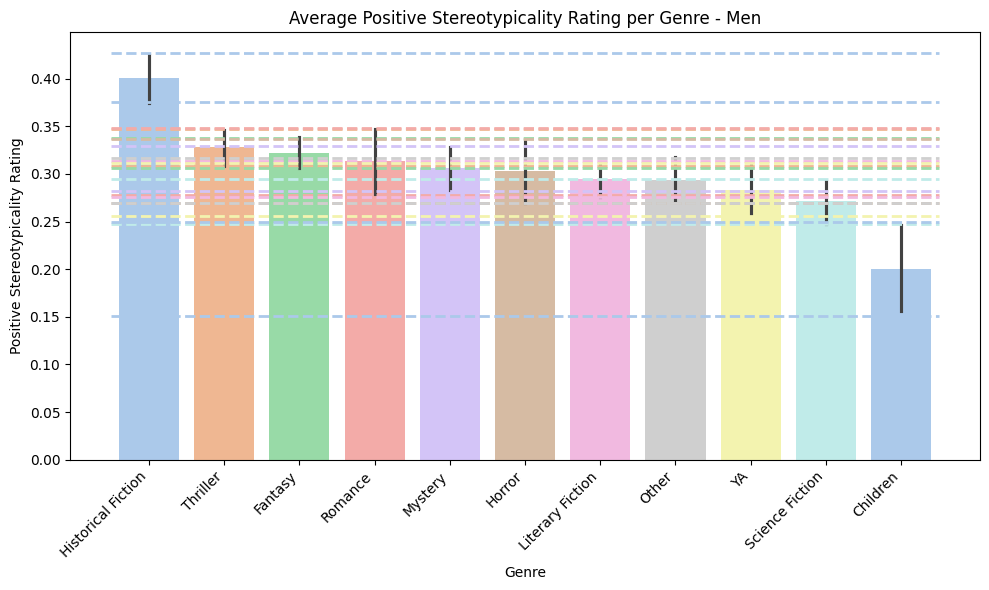

In [167]:
df_male = df_contemp[df_contemp['author_gender'] == 0]

# Calculate means and confidence intervals per group
summary = df_male.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_male, 
                      x='master_genre', 
                      y='prop_pos', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average Positive Stereotypicality Rating per Genre - Men")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Positive Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


* highest: historical fiction
* lowest: children

-> write it down like this, show plot, say 'as can be seen in the plot', say that complete table is available online

#### Women

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/596971486.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_female.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/596971486.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_female,


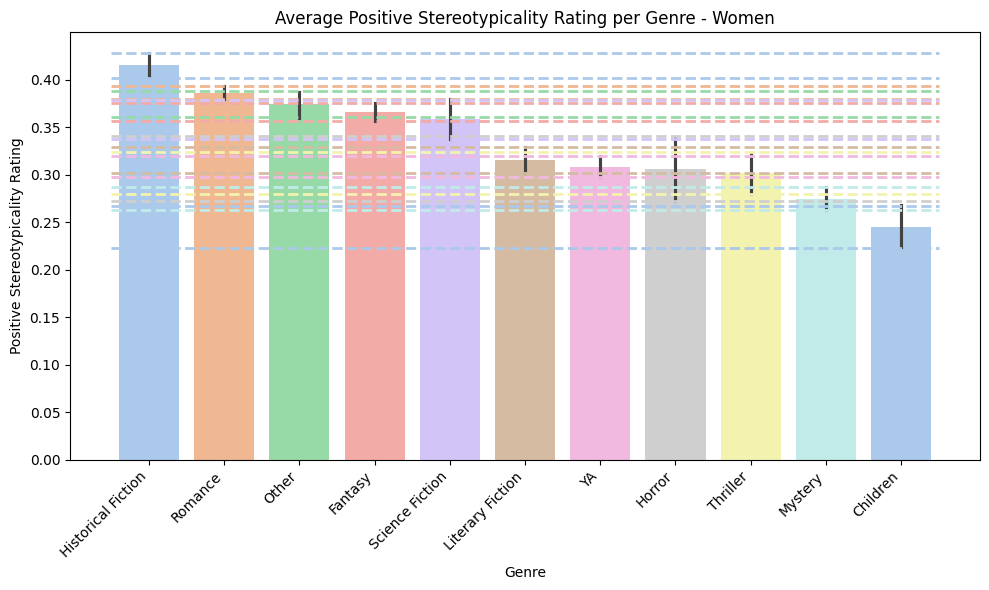

In [169]:
df_female = df_contemp[df_contemp['author_gender'] == 1]

# Calculate means and confidence intervals per group
summary = df_female.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_female, 
                      x='master_genre', 
                      y='prop_pos', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average Positive Stereotypicality Rating per Genre - Women")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Positive Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


* highest: historical fiction
* lowest: children (ns against mystery, which is the second lowest, but against all the rest)

-> write it down like this, show plot, say 'as can be seen in the plot', say that complete table is available online

## Anti-Stereotypical Items

In [48]:
# Fit the linear regression model
model_a_neg = smf.ols('prop_neg ~ author_gender', data=df_contemp).fit()

# Print the summary
print(model_a_neg.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_neg   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     80.81
Date:                Mon, 26 May 2025   Prob (F-statistic):           2.83e-19
Time:                        15:55:57   Log-Likelihood:                -450.96
No. Observations:               12666   AIC:                             905.9
Df Residuals:                   12664   BIC:                             920.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5452      0

In [49]:
model_a_g_neg = smf.ols('prop_neg ~ author_gender + master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_neg.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_neg   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        15:56:12   Log-Likelihood:                 341.06
No. Observations:               12666   AIC:                            -658.1
Df Residuals:                   12654   BIC:                            -568.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [50]:
# F-test to see if genre has an overall significant effect
f_test_neg = anova_lm(model_a_neg, model_a_g_neg)
print(f_test_neg)

   df_resid         ssr  df_diff    ss_diff           F  Pr(>F)
0   12664.0  796.324745      0.0        NaN         NaN     NaN
1   12654.0  702.710494     10.0  93.614251  168.575075     0.0


In [51]:
# Fit linear regression with interaction term 
model_a_g_i_neg = smf.ols('prop_neg ~ author_gender + master_genre + author_gender * master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_i_neg.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_neg   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     89.38
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        15:56:39   Log-Likelihood:                 385.35
No. Observations:               12666   AIC:                            -726.7
Df Residuals:                   12644   BIC:                            -562.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [52]:
model_me_neg = smf.ols('prop_neg ~ C(author_gender) * C(master_genre)', data=df_contemp).fit()
anova_model_me_neg = anova_lm(model_me_neg, typ=3)
print(anova_model_me_neg)

                                      sum_sq       df           F  \
Intercept                           7.922199      1.0  143.545874   
C(author_gender)                    0.066515      1.0    1.205210   
C(master_genre)                    41.471268     10.0   75.143649   
C(author_gender):C(master_genre)    4.896749     10.0    8.872639   
Residual                          697.813745  12644.0         NaN   

                                         PR(>F)  
Intercept                          6.728731e-33  
C(author_gender)                   2.723038e-01  
C(master_genre)                   2.073331e-150  
C(author_gender):C(master_genre)   1.089011e-14  
Residual                                    NaN  


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/4113269884.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_contemp.groupby('author_gender')['prop_neg'].mean())


author_gender
0    0.545205
1    0.500449
Name: prop_neg, dtype: float64


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/4113269884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_contemp, x='author_gender', y='prop_neg', palette='pastel', errorbar=('ci', 95))


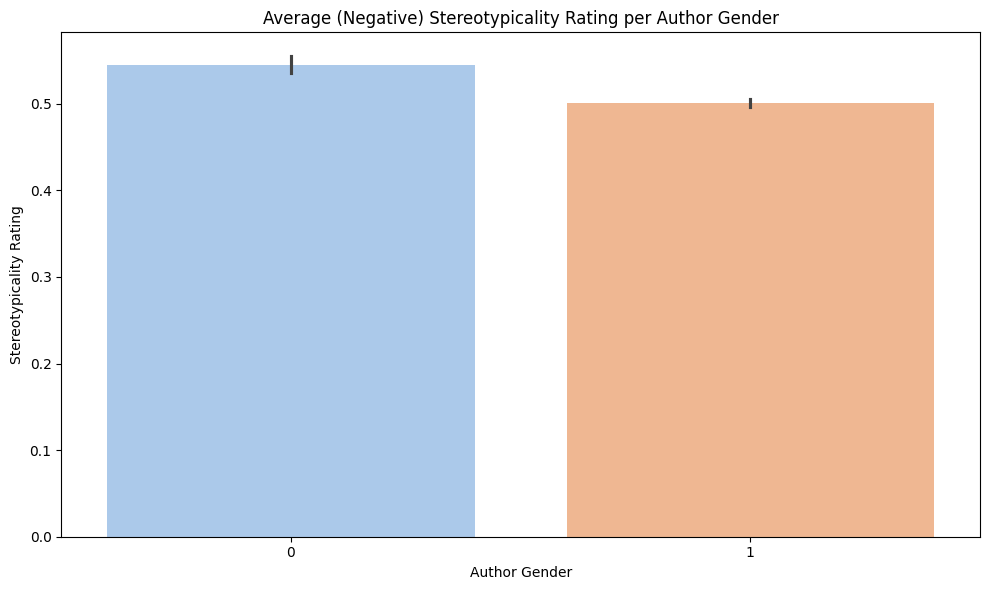

In [170]:
# Gender only - prop_pos - plot
print(df_contemp.groupby('author_gender')['prop_neg'].mean())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_contemp, x='author_gender', y='prop_neg', palette='pastel', errorbar=('ci', 95))

plt.title("Average (Negative) Stereotypicality Rating per Author Gender")
plt.ylabel("Stereotypicality Rating")
plt.xlabel("Author Gender")
plt.tight_layout()
plt.show()

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/2201356938.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_contemp.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/2201356938.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_contemp,


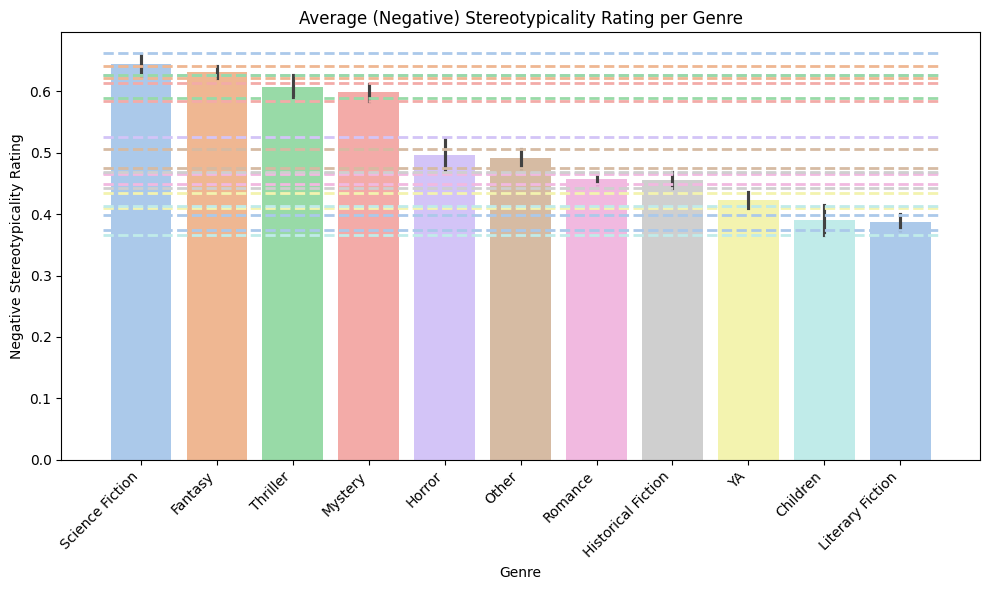

In [173]:
# Calculate means and confidence intervals per group
summary = df_contemp.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_contemp, 
                      x='master_genre', 
                      y='prop_neg', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average (Negative) Stereotypicality Rating per Genre")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Negative Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


* science fiction, fantasy, thriller, and mystery highest
* YA, children, literary fiction lowest

In [174]:
# Genre - prop_neg - significance test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NA values to avoid errors
df_clean = df_contemp[['master_genre', 'prop_neg']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_neg'],
                          groups=df_clean['master_genre'],
                          alpha=0.05)

print(tukey.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
          Children            Fantasy    0.241    0.0  0.1851   0.297   True
          Children Historical Fiction   0.0657 0.0109  0.0081  0.1232   True
          Children             Horror   0.1059    0.0  0.0377   0.174   True
          Children   Literary Fiction  -0.0035    1.0 -0.0618  0.0548  False
          Children            Mystery   0.2086    0.0  0.1509  0.2663   True
          Children              Other   0.1007    0.0  0.0424  0.1589   True
          Children            Romance   0.0675  0.004  0.0123  0.1226   True
          Children    Science Fiction   0.2544    0.0  0.1931  0.3158   True
          Children           Thriller   0.2177    0.0  0.1586  0.2768   True
          Children                 YA   0.0328 0.7756 -0.0256  0.0913  False

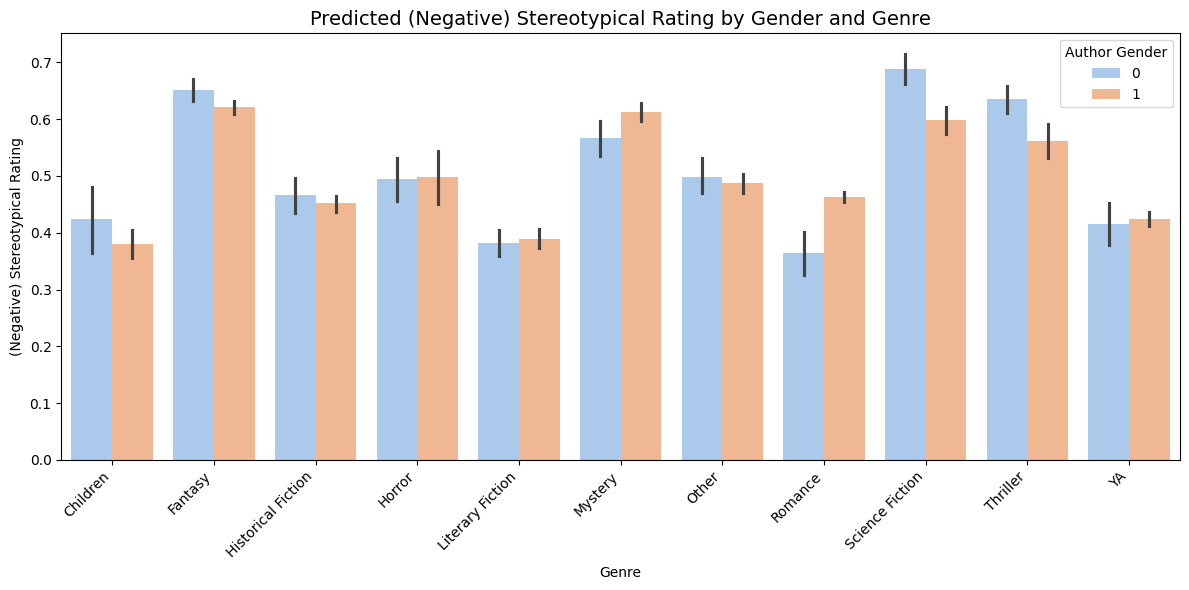

In [175]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_contemp, 
            x='master_genre', 
            y='prop_neg', 
            hue='author_gender', 
            palette='pastel',
            errorbar= ('ci', 95))

plt.xticks(rotation=45, ha='right')
plt.title("Predicted (Negative) Stereotypical Rating by Gender and Genre", fontsize=14)
plt.ylabel("(Negative) Stereotypical Rating")
plt.xlabel("Genre")
plt.legend(title="Author Gender")
plt.tight_layout()
plt.show()

Significant gender differences: 
* Romance
* Science Fiction
* Thriller

In [176]:
# Interaction - prop_neg - gender per genre significance test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_clean = df_contemp[['master_genre', 'author_gender', 'prop_neg']].dropna()

# Create interaction column
df_clean['interaction'] = df_clean['author_gender'].astype(str) + "_" + df_clean['master_genre'].astype(str)

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_neg'],
                          groups=df_clean['interaction'],
                          alpha=0.05)

print(tukey.summary())

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
          0_Children            0_Fantasy   0.2271    0.0  0.0955  0.3586   True
          0_Children 0_Historical Fiction   0.0419    1.0 -0.0937  0.1775  False
          0_Children             0_Horror   0.0703  0.975 -0.0699  0.2105  False
          0_Children   0_Literary Fiction  -0.0428    1.0 -0.1768  0.0912  False
          0_Children            0_Mystery   0.1418  0.026  0.0071  0.2765   True
          0_Children              0_Other   0.0746 0.9366 -0.0612  0.2104  False
          0_Children            0_Romance  -0.0607  0.997 -0.2044   0.083  False
          0_Children    0_Science Fiction   0.2646    0.0  0.1288  0.4003   True
          0_Children           0_Thriller   0.2119    0.0  0.0797  0.3442   True
          0_Children        

In [ ]:
# VALUES ARE WRONG (OLD DF), BUT MAYBE THIS FORMAT IS NICEST TO SHOW SIGNIFICANCE?

# # Interaction - prop_neg - gender per genre significance test

# from scipy.stats import ttest_ind

# # Create a list to store the results
# results = []

# for genre in df['master_genre'].unique():
#     # Subset the data for this genre
#     subset = df[df['master_genre'] == genre]
    
#     # Get prop_pos for each gender
#     men = subset[subset['author_gender'] == 0]['prop_neg'].dropna()
#     women = subset[subset['author_gender'] == 1]['prop_neg'].dropna()
    
#     # Perform t-test
#     t_stat, p_val = ttest_ind(men, women, equal_var=False)  # Welch's t-test is safer
    
#     # Store the result
#     results.append({
#         'genre': genre,
#         'mean_men': men.mean(),
#         'mean_women': women.mean(),
#         't_stat': t_stat,
#         'p_value': p_val,
#         'n_men': len(men),
#         'n_women': len(women)
#     })

# # Convert to DataFrame
# ttest_results = pd.DataFrame(results)

In [60]:
ttest_results

,genre,mean_men,mean_women,t_stat,p_value,n_men,n_women
0,Historical Fiction,0.429890,0.446903,-1.101647,2.710030e-01,433,980
1,Literary Fiction,0.372023,0.389710,-1.567974,1.171238e-01,667,743
2,Children,0.412190,0.361628,1.684803,9.647979e-02,54,251
3,Mystery,0.545110,0.603136,-3.526961,4.482552e-04,418,887
4,YA,0.415722,0.423221,-0.383035,7.020847e-01,166,874
5,Other,0.484866,0.485507,-0.038591,9.692283e-01,377,789
6,Romance,0.361493,0.461156,-6.281218,1.528923e-09,213,2896
7,Science Fiction,0.643693,0.595296,2.644603,8.359729e-03,387,324
8,Fantasy,0.637915,0.617463,1.918503,5.527002e-02,709,1457
9,Thriller,0.626218,0.560594,3.459422,5.712247e-04,584,353


### Genre differences within one gender?

In [178]:
# Significance Test
df_clean = df_contemp[['master_genre', 'author_gender', 'prop_neg']].dropna()

# Create interaction column
df_clean['interaction'] = df_clean['author_gender'].astype(str) + "_" + df_clean['master_genre'].astype(str)

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_neg'],
                          groups=df_clean['interaction'],
                          alpha=0.05)
print(tukey.summary())

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
          0_Children            0_Fantasy   0.2271    0.0  0.0955  0.3586   True
          0_Children 0_Historical Fiction   0.0419    1.0 -0.0937  0.1775  False
          0_Children             0_Horror   0.0703  0.975 -0.0699  0.2105  False
          0_Children   0_Literary Fiction  -0.0428    1.0 -0.1768  0.0912  False
          0_Children            0_Mystery   0.1418  0.026  0.0071  0.2765   True
          0_Children              0_Other   0.0746 0.9366 -0.0612  0.2104  False
          0_Children            0_Romance  -0.0607  0.997 -0.2044   0.083  False
          0_Children    0_Science Fiction   0.2646    0.0  0.1288  0.4003   True
          0_Children           0_Thriller   0.2119    0.0  0.0797  0.3442   True
          0_Children        

#### Men

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/4216753756.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_male.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/4216753756.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_male,


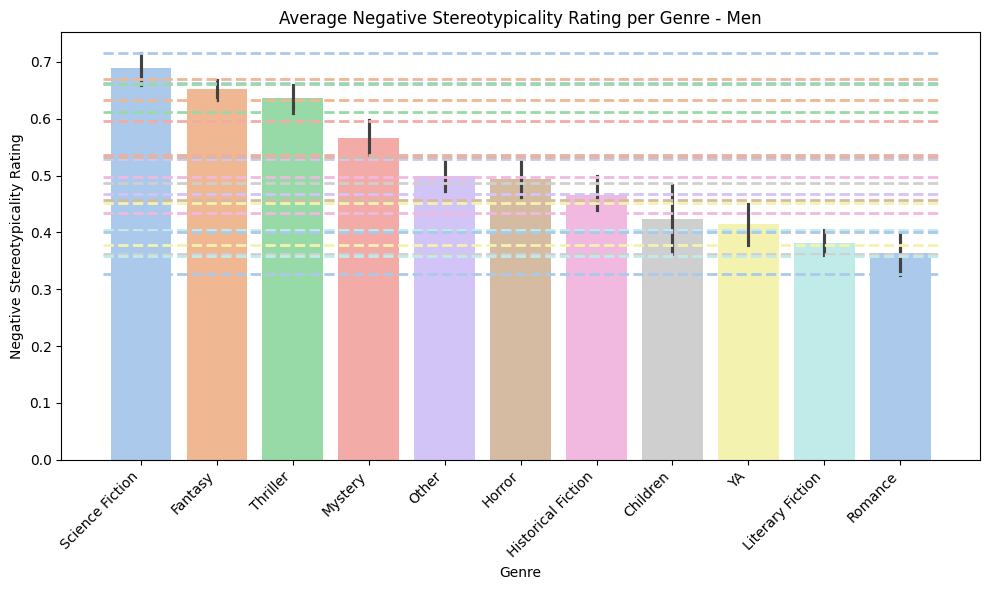

In [177]:
df_male = df_contemp[df_contemp['author_gender'] == 0]

# Calculate means and confidence intervals per group
summary = df_male.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_male, 
                      x='master_genre', 
                      y='prop_neg', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average Negative Stereotypicality Rating per Genre - Men")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Negative Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


* highest: Science Fiction, Fantasy, Thriller
* lowest/lower ones: (Romance, Literary Fiction, YA)

#### Women

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/3165160734.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_female.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/3165160734.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_female,


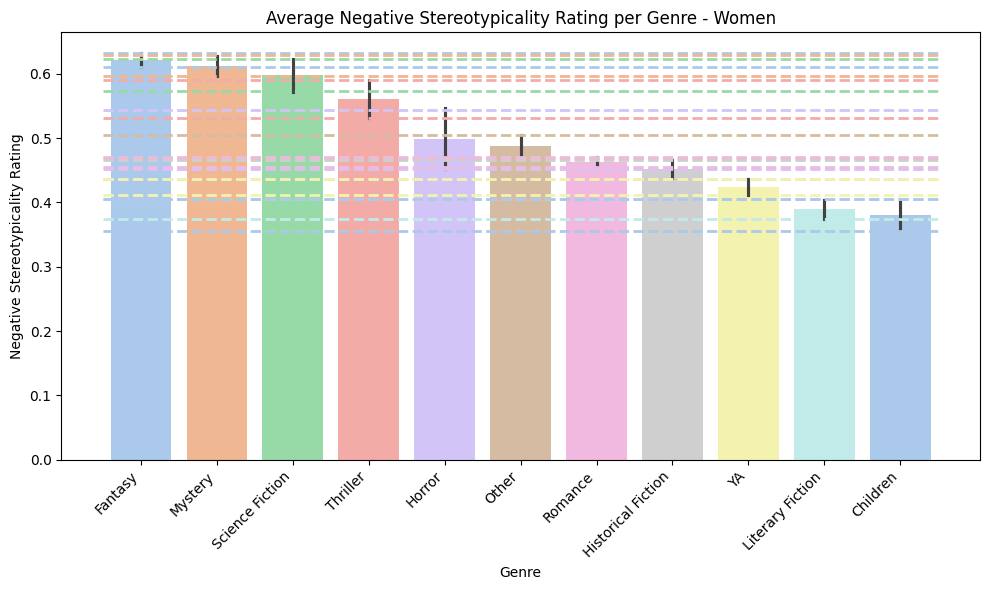

In [179]:
df_female = df_contemp[df_contemp['author_gender'] == 1]

# Calculate means and confidence intervals per group
summary = df_female.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_female, 
                      x='master_genre', 
                      y='prop_neg', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average Negative Stereotypicality Rating per Genre - Women")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Negative Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


* highest: Fantasy, Mystery, Science Fiction
* lowest/lower ones: Literary Fiction, Children